# Deep Learning et traitement du signal TP 1 

Listez les noms des étudiants (3 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom, affectation).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb 

- Théo Di Piazza - ENS Paris-Saclay (MVA)

Installez les paquets nécessaires à la réalisation de ce TP
<br> 
Vous pouvez utiliser dans le notebook 
!pip install \<nom_du_paquet\>
    


**Si vous souhaitez exécuter mon script sur Google Drive :**

- Créer un dossier "/content/drive/MyDrive/ENS MVA/I&I - Signal/TP1/img" pour enregistrer les images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt 
import scipy
import librosa 
import IPython.display as ipd
import os 

from sklearn.metrics import precision_score, recall_score

path_save = "/content/drive/MyDrive/ENS MVA/I&I - Signal/TP1/img"
path_data = "/content/drive/MyDrive/ENS MVA/I&I - Signal/TP1"

%matplotlib notebook

## Partie 1: Audio 

### Visualisation

 Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec librosa.open et écoutez le dans le notebook avec IPython.display.Audio


In [ ]:
# Read the audio file
# https://librosa.org/doc/main/generated/librosa.load.html
path = "/content/drive/MyDrive/ENS MVA/I&I - Signal/TP1/coloniedefourmies.wav"
y, sr = librosa.load(path = path, sr=None) # audio time series, sampling rate

### Mes notes :
- sr (sampling rate): Combien de samples sont enregistrés par seconde.
- y: represents the recorded samples of amplitudes (change of air pressure) in the audio.

⇒ Durée de l'audio : Nb de samples / Sample rate

In [ ]:
print("Le sampling rate est égale à: ", sr)
print("Le nombre de sample est égale à: ", len(y))
print("La durée de l'audio est de: ", "{:.2f}".format(len(y)/sr), " secondes.")

Le sampling rate est égale à:  44100
Le nombre de sample est égale à:  376571
La durée de l'audio est de:  8.54  secondes.


Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 

In [ ]:
# https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
ipd.Audio(y, rate = sr)

Tout d'abord, représentons l'amplitude du signal dans le temps.

'/content/drive/MyDrive/ENS MVA/I&I - Signal/TP1/img/signal_original.png'

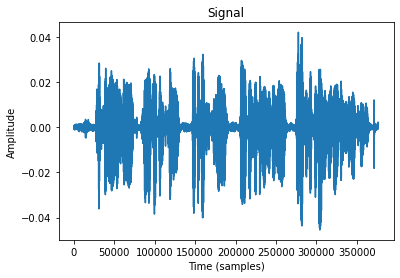

In [ ]:
%matplotlib inline
# Plot amplitude VS temps
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

# Save the plot
os.path.join(path_save, "signal_original.png")

Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.

### Mes notes :     
- Le spectrogramme est un diagramme représentant le spectre d'un phénomène périodique, associant à chaque fréquence une intensité ou une puissance.
Un spectrogramme est la représentation visuelle d'un son. Il représente la fréquence en fonction du temps et l'intensité sonore associée à chaque fréquence est représentée par un niveau de couleur : plus le point de couleur est foncé, plus l'intensité sonore est élevée.

- La transformée de Fourier est une formule mathématique qui nous permet de décomposer un signal en ses fréquences individuelles et en l'amplitude de la fréquence. En d'autres termes, elle convertit le signal du domaine temporel au domaine fréquentiel. Le résultat est appelé un spectre.

- Intuition de la transformée de Fourier pour un signal : on passe d'un signal samplé dans le temps/l'espace à un signal samplé en fréquence temporelle/spaciale.

'/content/drive/MyDrive/ENS MVA/I&I - Signal/TP1/img/spectogram_original.png'

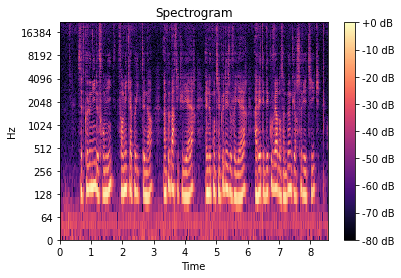

In [ ]:
%matplotlib inline

import librosa.display

# Compute STFT : Short-time Fourier transform
spec = np.abs(librosa.stft(y, hop_length=512))
# Turn amplitude to decibel
spec = librosa.amplitude_to_db(spec, ref=np.max)
# Display the spectrogram
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

# Save the plot
os.path.join(path_save, "spectogram_original.png")

### Rééchantillonnage

Nous allons procéder de deux façons pour sous-échantillonner votre signal d'un facteur 2: 
- Supprimez un point sur deux: signal -> signal_reech_1
- Utilisez la fonction librosa.resample: signal -> signal_reech_2

Ecoutez les deux résultats dans le notebook et affichez le spectrogramme de (signal_reech_1 - signal) et (signal_reech_2 - signal). 

Les deux méthodes de rééchantillonnage sont elles équivalentes ? Interprétez les éventuelles différences

In [ ]:
######################################################################
# Première méthode pour sous-échantillonner un signal d'un facteur 2 #
######################################################################

# Initialisation d'un array vide 'signal_reech_1' pour créer le nouveau signal sous-échantillonné
signal_reech_1 = np.array([])

# Pour chaque sample du signal : on en sélectionne qu'un sur 2
for i in range(len(y)):
  # Si l'indice est impair : le sample est supprimé du signal
  if (i % 2 == 0):
    signal_reech_1 = np.append(signal_reech_1, y[i])

#####################################################################
# Seconde méthode pour sous-échantillonner un signal d'un facteur 2 #
#####################################################################
signal_reech_2 = librosa.resample(y, orig_sr = sr, target_sr = sr/2)

######################################################
# Comparaison du nombre de sample pour chaque signal #
######################################################
print("Le signal original a ", len(y), " samples.")
print("Le signal signal_reech_1 a ", len(signal_reech_1), " samples.")
print("Le signal signal_reech_2 a ", len(signal_reech_2), " samples.")

Le signal original a  376571  samples.
Le signal signal_reech_1 a  188286  samples.
Le signal signal_reech_2 a  188286  samples.


In [ ]:
# Ecoute du signal 1
ipd.Audio(signal_reech_1, rate = sr/2)

In [ ]:
# Ecoute du signal 2
ipd.Audio(signal_reech_2, rate = sr/2)

### Remarques sur l'écoute des 2 signaux :
Le signal obtenu avec la méthode librosa.resample semble légèrement de meilleure qualité, car pour le premier signal, on peut entendre un ultrason en bruit de fond.

'/content/drive/MyDrive/ENS MVA/I&I - Signal/TP1/img/spectogram_resample_2.png'

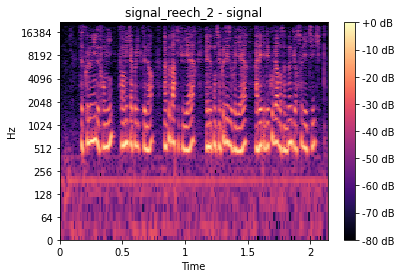

In [ ]:
%matplotlib inline

# Affichage des spectrogrammes de (signal_reech_1 - signal) et (signal_reech_2 - signal)

##################
# SIGNAL_REECH_2 #
##################

# Use librosa library once again to resample signal_reech_1 from sr/2 to sr.
signal_reech_2 = librosa.resample(signal_reech_2, orig_sr = sr, target_sr = sr/2)

# Compute STFT : Short-time Fourier transform
spec = np.abs(librosa.stft(signal_reech_2, hop_length=512))
# Turn amplitude to decibel
spec = librosa.amplitude_to_db(spec, ref=np.max)

# Display the spectrogram
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title("signal_reech_2 - signal")

# Save the plot
os.path.join(path_save, "spectogram_resample_2.png")

## Observations du spectogramme :

On constate que le décibel associées aux fréquences inférieures à 512Hz du signal sont beaucoup plus faibles (~ -30dB) pour ce signal, que sur le signal original (~ 0dB). Ainsi, le resample de la librairie librosa semble être capable d'identifier quels sont les samples à conserver afin d'avoir une qualité du signal optimale, tout en modifiant le sample rate.

### Calcul du Pitch

Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix.

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Commentez.

## Mes notes :
- Le Pitch est la période (ou fréquence) fondamentale d'un signal.

In [ ]:
# Function detect_pitch : to track the pitch of a signal y with sample rate sr, at time t
# Source : https://stackoverflow.com/questions/43877971/librosa-pitch-tracking-stft

def detect_pitch(y, sr, t):

  # Calcul des pitches and magnitudes du signal original
  pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
  
  # Indice 
  index = magnitudes[:, t].argmax()
  pitch = pitches[index, t]

  return pitch

'/content/drive/MyDrive/ENS MVA/I&I - Signal/TP1/img/pitch_original.png'

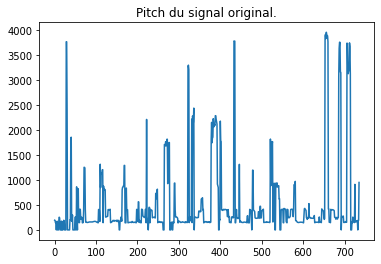

In [ ]:
%matplotlib inline

# Compute pitch at every time
pitch_lst, time_lst = [], []

# For each time available t
for t in range(736):
  
  # Compute the pitch at t
  pitch_lst.append(detect_pitch(y, sr, t))
  time_lst.append(t)

plt.plot(time_lst, pitch_lst)
plt.title("Pitch du signal original.")

# Save the plot
os.path.join(path_save, "pitch_original.png")

## Partie 2: Détection d'impulsion

Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 

Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 



## Mes notes :     
10 000 signaux de 1 secondes. 

Echantillonné à 1000Hz ⇒ Période de 0.001s ⇒ 1/0.001 = 1 000 ⇒ Longueur de chaque signal : 1 000 !

In [20]:
# Load data
donnees = np.load(os.path.join(path_data, "signaux_impulsions.npz"))

# Split data into observations/labels
signaux = donnees['data']
labels = donnees['labels']

In [21]:
# Information sur le jeu de données
print("Shape de 'signaux': ", signaux.shape)
print("Shape de 'labels': ", labels.shape)

Shape de 'signaux':  (10000, 1000)
Shape de 'labels':  (10000,)


Proposez une méthode (simple) pour décider si un signal contient une impulsion ou non. Cette méthode fera intervenir un seuil. 
Utilisez votre méthode sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 

Nous allons comparer vos résultats aux résultats idéaux consignés dans le tableau labels. 

Calculez le nombre de signaux pour lesquels votre résultat concorde avec le résultat idéal. 



In [22]:
N = 10000

# List to stock absolute value of amplitudes of each signal
amplitude_max, amplitude_mean, ecart = [], [], []

# For each signal s
for s in range(N):

  # Compute the maximum of absolute value of amplitudes of the signal s
  amplitude_max.append( np.max(np.abs(signaux[s])) )

  # Other metrics computed
  amplitude_mean.append(np.mean(signaux[s]))
  ecart.append(np.max(signaux[s] - np.min(signaux[s]) ))

# Change type as array
amplitude_max = np.array(amplitude_max)

# Make dataframe with columns : amplitude_max, labels
df = pd.DataFrame({'labels': labels.astype(int), 
                   'amplitude_max': amplitude_max,
                   'amplitude_mean': amplitude_mean,
                   'ecart': ecart})

BoxPlot pour comparer les signaux en fonction de leur label

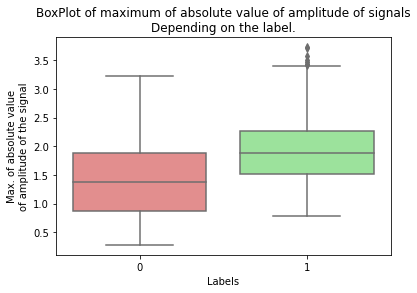

'/content/drive/MyDrive/ENS MVA/I&I - Signal/TP1/img/part2_boxplot_amplitudeMax_2signals.png'

In [23]:
%matplotlib inline

# Make a BoxPlot of Max. of absolute value of amplitude of signals.
sns.boxplot(x = "labels", y = "amplitude_max", data=df, palette = ['lightcoral', 'lightgreen'])

plt.title("BoxPlot of maximum of absolute value of amplitude of signals\nDepending on the label.")
plt.xlabel('Labels')
plt.ylabel('Max. of absolute value\nof amplitude of the signal')

plt.show()
# Save the plot
os.path.join(path_save, "part2_boxplot_amplitudeMax_2signals.png")

Détermination du seuil et affichage de la matrice de confusion.

Règle de décision pour un signal:     
- Si $max( |amplitudes| ) ≥ S ⇒$ Label 1.
- Sinon ⇒ Label 0.

Avec $S$ : 1er quartile des maximums en valeur absolue des amplitudes des signaux avec label 1.

In [24]:
# The threshold S
S = df[labels==1].amplitude_max.quantile(0.25)

# Apply threshold to compute predictions
df['prediction'] = 1*(df['amplitude_max']>=S)

# Calcul de la précision sur la classe 1
print('Precision: %.3f' % precision_score(df.labels, df.prediction))

# Calcul du recall sur la classe 1
print('Recall: %.3f' % recall_score(df.labels, df.prediction))

Precision: 0.634
Recall: 0.750


La précision est définie comme (le nombre de signaux décidés positifs par votre méthode et qui sont effectivement positifs)/(le nombre de signaux décidés positifs par votre méthode)

et le rappel comme (le nombre de signaux décidés positifs par votre méthode et qui sont effectivement positifs)/(le nombre de signaux réellement positifs)

Faites varier le seuil et enregistrez pour ses différentes valeurs la précision et le rappel de votre méthode. Affichez dans le plan (précision , rappel) les points de fonctionnement de votre méthode. Commentez le résultat. 

'/content/drive/MyDrive/ENS MVA/I&I - Signal/TP1/img/part2_precisionVSrecall.png'

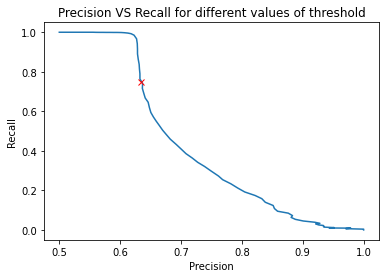

In [30]:
# Fonction qui renvoie la précision et le recall de la classe 1 à partir de d'un seuil
def get_metrics(S: float = 0.5):

  # Make prediction with this given threshold
  df['prediction'] = 1*(df['amplitude_max']>=S)

  return precision_score(df.labels, df.prediction), recall_score(df.labels, df.prediction)

# Variation du seuil et enregistrement des différentes valeurs 
results = {"seuil": [], "precision": [], "recall": []}

# Pour chaque seuil
for S in np.linspace(min(df.amplitude_max), max(df.amplitude_max), 100):

  # Calcul de la précision et du rappel
  pre, rec = get_metrics(S)
  # Save results
  results["seuil"].append(S); results["precision"].append(pre); results["recall"].append(rec)

# Affichage des résultats
# Courbe Precision VS Recall
plt.plot(results['precision'], results['recall'])
# Affichage des métriques de ma méthode
plt.plot(0.634, 0.750, "x", color='r')

plt.title("Precision VS Recall for different values of threshold")
plt.xlabel("Precision")
plt.ylabel("Recall")

# Save the plot
os.path.join(path_save, "part2_precisionVSrecall.png")

Comme l'illustre le résultat ci-dessus, il y a un trade-off entre la précision et le rappel.

Lorsque la précision est très bonne (~1), la recall a tendance à diminuer (et inversement).

Lorsque le recall est très bon, cela signifie que la méthode utilisée détecte quasiment tous les signaux qui sont réellement positifs (Vrai positifs). Pour cela, le seuil de détection fixé est très faible. La conséquence d'utiliser un seuil si faible est que de nombreux signaux négatifs vont être détectés comme positifs (Faux positifs). Ce qui explique pourquoi le recall devient si faible.

Points positifs de la méthode utilisée :    
- Très simple à implémenter et rapide.

Points négatifs de la méthode utilsiée :     
- Pas de split train/test donc sur-entrainement + biais.
- On n'exploite pas tout le potentiel des données que l'on a.

# Conclusion du TP1

- Partie 1 : Prise en main des librairies de bases pour l'analyse des signaux. Découverte des spectogrammes, du pitch et des représentations visuelles.


- Partie 2 : Implémentation d'un algorithme simple de détection.

Merci pour votre lecture.

Théo Di Piazza

# FIN